In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.text import TextPath

from random import randint, choice

In [2]:
BOARD_WIDTH, BOARD_HEIGHT = 10, 10

In [3]:
def knight_move(s, moves, w, h):
    (x, y) = s
    
    dirs = [(-1,-2),(-2,-1),(-2,1),(-1,2),(1,-2),(2,-1),(2,1),(1,2)]
    possible_moves = []
    for (x_inc, y_inc) in dirs:
        if 0 <= x+x_inc < w and 0 <= y+y_inc < h:
            
            # repeat squares are not allowed
            if (x+x_inc, y+y_inc) not in moves:
                possible_moves.append((x+x_inc, y+y_inc))
    
    return possible_moves

In [4]:
def plot_board(w, h, moves, figsize=None, path=None):
    """Plot a maze by drawing lines between adjacent squares, except for pairs in maze.edges"""
    plt.figure(figsize=figsize or (w/5, h/5))
    plt.axis('off')
    plt.gca().invert_yaxis()
    
    # iterate through all possible coordinates on the grid
    for (x, y) in [(x, y) for x in range(w) for y in range(h)]:
        
        # iterate through all possible neighbors of all possible grid points
        for nbr in [(x + 1, y), (x - 1, y), (x, y + 1), (x, y - 1)]:
            
            # paint the neighbor as a wall
            plot_wall((x,y), nbr)
    
    for move_number, s in enumerate(moves):
        plot_move(s, move_number+1)
        
def plot_wall(s1, s2):
    """Plot a wall: a black line between squares s1 and s2."""
    (x1, y1), (x2, y2) = s1, s2
    if x1 == x2: # horizontal wall
        y = max(y1, y2)
        X, Y = [x1, x1+1], [y, y]
    else: # vertical wall
        x = max(x1, x2)
        X, Y = [x, x], [y1, y1+1]
    plt.plot(X, Y, 'k-', linewidth=2)
    

def plot_move(s, move_number):
    """ plot a move made by a night """ 
    (x, y) = s
    if type(move_number) == int:
        move_number = str(move_number)
        
    path = TextPath(xy=(x,y), s=move_number)
    plt.plot(x+.25, y+.75, marker=path, markersize=50, color='black')
    

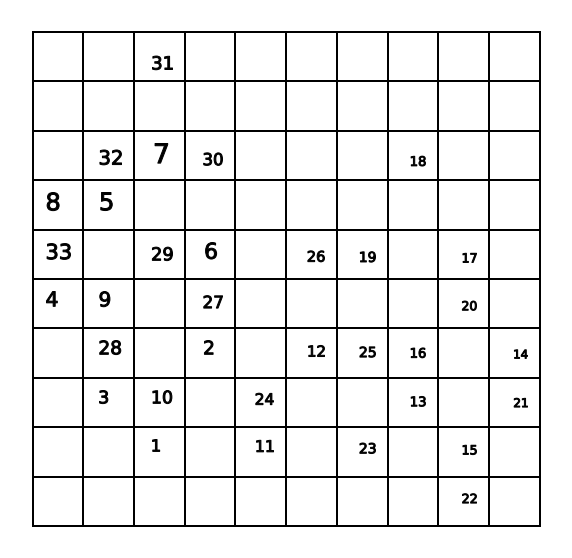

In [11]:
pos = (randint(0, BOARD_WIDTH-1), randint(0, BOARD_HEIGHT-1))
moves = []
for _ in range(33):
    moves += [pos]
    pos = choice(knight_move(pos, moves, BOARD_WIDTH, BOARD_HEIGHT))
    
plot_board(10, 10, moves, figsize=(10, 10))

In [ ]:
def color_board():
    # color the board regions st
    # 1) no 2 adjacent regions are the same color
    # 2) the sum of regions is the same
    pass